In [518]:
import pandas as pd
import matplotlib.pyplot as plt
import feather
import os
import random
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
sibling_directory = os.path.join(parent_directory,'data')

In [519]:
processed_directory = os.path.join(sibling_directory, 'processed')
feather_file_path = os.path.join(processed_directory, 'icu_chartevents_timeseries_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather')
df = feather.read_dataframe(feather_file_path)
df['abs_event_time'] = pd.to_datetime(df['abs_event_time'])
print(df.columns)

Index(['abs_event_time', 'stay_id', 'Activity / Mobility (JH-HLM)',
       'Apnea Interval', 'Arterial Blood Pressure Alarm - High',
       'Arterial Blood Pressure Alarm - Low',
       'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure mean',
       'Arterial Blood Pressure systolic', 'Current Dyspnea Assessment',
       'Daily Weight', 'Expiratory Ratio', 'Fspn High', 'GCS - Eye Opening',
       'GCS - Motor Response', 'GCS - Verbal Response',
       'Glucose finger stick (range 70-100)', 'Heart Rate',
       'Heart Rate Alarm - Low', 'Heart rate Alarm - High', 'Height (cm)',
       'Inspired O2 Fraction', 'Mean Airway Pressure', 'Minute Volume',
       'Minute Volume Alarm - High', 'Minute Volume Alarm - Low',
       'Non Invasive Blood Pressure diastolic',
       'Non Invasive Blood Pressure mean',
       'Non Invasive Blood Pressure systolic',
       'Non-Invasive Blood Pressure Alarm - High',
       'Non-Invasive Blood Pressure Alarm - Low', 'O2 Flow',
       'O2 Satur

In [520]:
temperature_values = df['Temperature Celsius'].values
stay_id_values = df['stay_id'].values
time_values = df['abs_event_time'].values
print("Temperature in Celsius:", temperature_values)
print("Stay ID Values:", stay_id_values)
print("Time Values:", time_values)
grouped_df = df.groupby('stay_id')

# Include additional columns in the grouped dictionary
grouped_readings = grouped_df[['abs_event_time', 'Temperature Celsius']].apply(list).to_dict()


print(grouped_readings)

Temperature in Celsius: [36.8 36.8 36.8 ... 37.6 37.6 37.6]
Stay ID Values: [30057454 30057454 30057454 ... 39880770 39880770 39880770]
Time Values: ['1970-01-01T01:00:00.000000000' '1970-01-01T02:00:00.000000000'
 '1970-01-01T03:00:00.000000000' ... '1970-01-01T22:00:00.000000000'
 '1970-01-01T23:00:00.000000000' '1970-01-02T00:00:00.000000000']
{30057454: ['abs_event_time', 'Temperature Celsius'], 30101877: ['abs_event_time', 'Temperature Celsius'], 30425410: ['abs_event_time', 'Temperature Celsius'], 30458995: ['abs_event_time', 'Temperature Celsius'], 30585761: ['abs_event_time', 'Temperature Celsius'], 30665396: ['abs_event_time', 'Temperature Celsius'], 30757476: ['abs_event_time', 'Temperature Celsius'], 30849778: ['abs_event_time', 'Temperature Celsius'], 30864406: ['abs_event_time', 'Temperature Celsius'], 30876334: ['abs_event_time', 'Temperature Celsius'], 30913302: ['abs_event_time', 'Temperature Celsius'], 30932571: ['abs_event_time', 'Temperature Celsius'], 30955999: ['ab

In [521]:
random_group_stay_id = random.choice(list(grouped_readings.keys()))
random_group_readings = grouped_readings[random_group_stay_id]

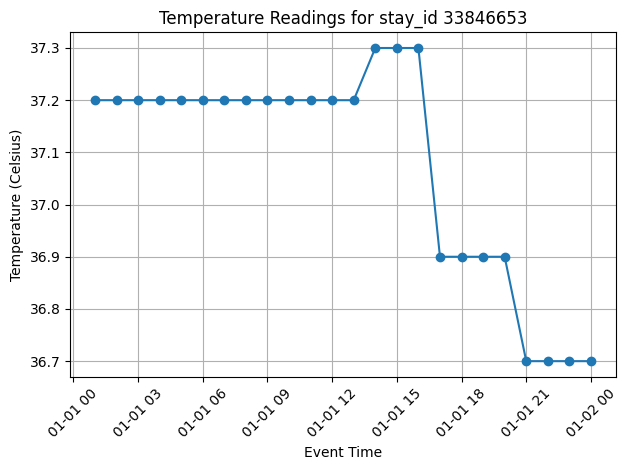

In [522]:
random_group_stay_id = random.choice(list(grouped_df.groups.keys()))
random_group_df = grouped_df.get_group(random_group_stay_id)

# Plot temperature readings against absolute event times for the random group
plt.plot(random_group_df['abs_event_time'], random_group_df['Temperature Celsius'], marker='o')
plt.title(f'Temperature Readings for stay_id {random_group_stay_id}')
plt.xlabel('Event Time')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()